### This notebook is intended to prepare the acquired wave data from the [CDIP](https://cdip.ucsd.edu/m/stn_table/) website for segregating the different wave windows based on the wave amplitudes. The ultimate motive for carrying out this task is to design a rogue wave classification system that can be employed differentially for waves of different magnitude ranges. 

#### Importing the modules

In [1]:
import os
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import time
import math
from tensorflow import keras
import seaborn as sns
import random
import tensorflow as tf
from sklearn.metrics import confusion_matrix

**The maximum wave height in a wave window is found out to adjust the indices and create the wave windows with the presence or absence oa rogue wave at the end of the data window.** 

In [2]:
def find_max_wave_height(zdisp_window):
    zero_crossings = np.where(np.diff(np.sign(zdisp_window)))[0]
    zero_crossings= np.append(zero_crossings, len(zdisp_window)-1);
    zero_crossings= np.append(-1,zero_crossings)
    h_wave=np.zeros(len(zero_crossings)-1)
    t_wave=np.zeros(len(zero_crossings)-1)
            
    for iter_zero_crossing in range(len(zero_crossings)-1):
        peak_idx=np.argmax(np.abs(zdisp_window[zero_crossings[iter_zero_crossing]+1:zero_crossings[iter_zero_crossing+1]+1]))
        h_wave[iter_zero_crossing]=zdisp_window[zero_crossings[iter_zero_crossing]+1+peak_idx]
        t_wave[iter_zero_crossing]=zero_crossings[iter_zero_crossing]+1+peak_idx
                
    max_wave_height=max(np.abs(np.diff(h_wave)))
    max_index = int(t_wave[np.argmax(np.abs(np.diff(h_wave)))])
    
    return max_wave_height, max_index

**Function to create the data arrays containing rogue waves at the end of the window**

In [3]:
def populate_rw_arrays(dir, array, start_idx, end_idx):
    for folder in os.listdir(dir):
        print("Processing: " + folder)
        
        start_time = time.time()
        for file in os.listdir(dir+ "/" + folder):
            if file.endswith(".npz"):
                data=np.load(dir+"/"+ folder+"/"+file)
                z_tmp=data['zdisp'][start_idx:end_idx]
                #print(z_tmp.shape)
                significant_wave_height=4*np.std(data['zdisp'])#[start_idx:-1]
                z_disp_rw.append(z_tmp/significant_wave_height)
                #print(z_disp_rw[0].shape)
        print("--- %s seconds ---" % (time.time() - start_time))
    return

**Function to pick the rogue wave at the end of the window for windows containing rogue waves (similar to the last one but kept different for clarity)**

In [4]:
def populate_rw_arrays_waves(dir, array, start_idx, end_idx):
    for folder in os.listdir(dir):
        print("Processing: " + folder)
        
        start_time = time.time()
        for file in os.listdir(dir+ "/" + folder):
            if file.endswith(".npz"):
                data=np.load(dir+"/"+ folder+"/"+file)
                z_tmp=data['zdisp'][start_idx:end_idx]
                #print(z_tmp.shape)
                significant_wave_height=4*np.std(data['zdisp'])#[start_idx:-1]
                z_disp_rw_waves.append(z_tmp/significant_wave_height)
                #print(z_disp_rw[0].shape)
        print("--- %s seconds ---" % (time.time() - start_time))
    return

**Function to create the data arrays *NOT* containing rogue waves at the end of the window**

In [5]:
def populate_norw_arrays(dir, array, end_idx):
    for folder in os.listdir(dir):
        print("Processing: " + folder)
        
        start_time = time.time()
        for file in os.listdir(dir+ "/" + folder):
            if file.endswith(".npz"):
                data=np.load(dir+"/"+ folder+"/"+file)
                z_tmp=data['zdisp_norw'][0:end_idx]
                #print(z_tmp.shape)
                significant_wave_height=4*np.std(data['zdisp_norw'])#[start_idx:-1]
                z_disp_norw.append(z_tmp/significant_wave_height)

        print("--- %s seconds ---" % (time.time() - start_time))
    return 

**Function to access and store the wave at the end of the data window  *NOT* containing rogue waves**

In [6]:
def populate_norw_arrays_waves(dir, array, end_idx):
    for folder in os.listdir(dir):
        print("Processing: " + folder)
        
        start_time = time.time()
        for file in os.listdir(dir+ "/" + folder):
            if file.endswith(".npz"):
                data=np.load(dir+"/"+ folder+"/"+file)
                z_tmp=data['zdisp_norw'][end_idx-1:end_idx]
                #print(z_tmp.shape)
                significant_wave_height=4*np.std(data['zdisp_norw'])#[start_idx:-1]
                z_disp_norw_waves.append(z_tmp/significant_wave_height)

        print("--- %s seconds ---" % (time.time() - start_time))
    return 

**Accessing the wave data : $t_{training}$ = 15 minutes and $t_{advance}$ = 5 minutes** 

In [7]:
root_folder_rw = "D:/ExtremeWavesClassification" + "/wave_height_g_2"
root_folder_norw = "D:/ExtremeWavesClassification" + "/wave_height_g_2"

window_start_min_rel_to_rw=-20
window_length_in_min=15

samplerate=1.28

rw_idx=round(25*60*samplerate)
start_idx=round((25+window_start_min_rel_to_rw)*60*samplerate)
end_idx=start_idx+round(window_length_in_min*60*samplerate)

**Populating the training window arrays for all the data windows - leading and not leading up to rogue waves.**

In [8]:
rw_dir=root_folder_rw + '/rw_samples'
z_disp_rw=[] 
#z_disp_rw_buoy_067=[] 
populate_rw_arrays(rw_dir, z_disp_rw, start_idx, end_idx)

z_disp_norw=[]
#z_disp_norw_buoy_067=[]
norw_dir=root_folder_norw + '/norw_samples'
#norw_dir=root_folder_norw 
end_idx=end_idx-start_idx
populate_norw_arrays(norw_dir, z_disp_norw, end_idx)

Processing: Buoy_028
--- 25.33512258529663 seconds ---
Processing: Buoy_029
--- 42.1066677570343 seconds ---
Processing: Buoy_036
--- 41.584686040878296 seconds ---
Processing: Buoy_043
--- 17.394924879074097 seconds ---
Processing: Buoy_045
--- 27.848321676254272 seconds ---
Processing: Buoy_067
--- 27.27306580543518 seconds ---
Processing: Buoy_071
--- 32.54585027694702 seconds ---
Processing: Buoy_076
--- 34.540775299072266 seconds ---
Processing: Buoy_081
--- 0.0010156631469726562 seconds ---
Processing: Buoy_087
--- 0.0 seconds ---
Processing: Buoy_088
--- 0.0 seconds ---
Processing: Buoy_089
--- 0.0 seconds ---
Processing: Buoy_090
--- 0.0010471343994140625 seconds ---
Processing: Buoy_091
--- 3.4673027992248535 seconds ---
Processing: Buoy_092
--- 32.65755367279053 seconds ---
Processing: Buoy_093
--- 11.224771976470947 seconds ---
Processing: Buoy_094
--- 27.507524967193604 seconds ---
Processing: Buoy_095
--- 6.499585390090942 seconds ---
Processing: Buoy_096
--- 18.7044689655

**Populating the arrays to store the wave at the end of the window for all the data windows - leading and not leading up to rogue waves.**

In [11]:
rw_dir=root_folder_rw + '/rw_samples'
z_disp_rw_waves=[] 
populate_rw_arrays_waves(rw_dir, z_disp_rw_waves, rw_idx, rw_idx+1)

z_disp_norw_waves=[]
norw_dir=root_folder_norw + '/norw_samples'
end_idx=end_idx-start_idx
populate_norw_arrays_waves(norw_dir, z_disp_norw_waves, end_idx)

Processing: Buoy_028
--- 5.662668704986572 seconds ---
Processing: Buoy_029
--- 9.092344045639038 seconds ---
Processing: Buoy_036
--- 9.097683906555176 seconds ---
Processing: Buoy_043
--- 3.03595232963562 seconds ---
Processing: Buoy_045
--- 5.855994462966919 seconds ---
Processing: Buoy_067
--- 5.98769736289978 seconds ---
Processing: Buoy_071
--- 7.186327219009399 seconds ---
Processing: Buoy_076
--- 7.672065258026123 seconds ---
Processing: Buoy_081
--- 0.0 seconds ---
Processing: Buoy_087
--- 0.001008749008178711 seconds ---
Processing: Buoy_088
--- 0.0 seconds ---
Processing: Buoy_089
--- 0.0 seconds ---
Processing: Buoy_090
--- 0.0 seconds ---
Processing: Buoy_091
--- 0.7055056095123291 seconds ---
Processing: Buoy_092
--- 6.876481056213379 seconds ---
Processing: Buoy_093
--- 2.533170700073242 seconds ---
Processing: Buoy_094
--- 5.698296546936035 seconds ---
Processing: Buoy_095
--- 1.4655437469482422 seconds ---
Processing: Buoy_096
--- 3.6424875259399414 seconds ---
Process

In [12]:
z_disp_rw_waves = np.vstack(z_disp_rw_waves)
z_disp_rw_waves

array([[-1.056741  ],
       [-0.86920512],
       [-1.10050988],
       ...,
       [-1.02611768],
       [-0.97446096],
       [-1.04772186]])

In [13]:
print(z_disp_rw_waves.shape)

(169961, 1)


In [19]:
abs_rw = abs(z_disp_rw_waves)

In [14]:
z_disp_norw_waves = np.vstack(z_disp_norw_waves)
z_disp_norw_waves

array([[-0.01688479],
       [-0.40611008],
       [-0.08504346],
       ...,
       [-0.31787717],
       [-0.14953029],
       [-0.64400923]])

**Storing the arrays for both the rogue wave and non-rogue wave samples for future use**

In [15]:
np.savez(os.getcwd()+'x_rw_samples',z_disp_rw=z_disp_rw)
np.savez(os.getcwd()+'x_norw_samples',z_disp_norw=z_disp_norw)
np.savez(os.getcwd()+'y_rw_samples',z_disp_rw_waves=z_disp_rw_waves)
np.savez(os.getcwd()+'y_norw_samples',z_disp_norw_waves=z_disp_norw_waves)

In [16]:
data_rw_window=np.load(os.getcwd()+'x_rw_samples'+".npz")
data_rw = np.load(os.getcwd()+'y_rw_samples'+".npz")
data_norw_window = np.load(os.getcwd()+'x_norw_samples'+".npz")
data_norw = np.load(os.getcwd()+'y_norw_samples'+".npz")

In [17]:
x_rw = data_rw_window['z_disp_rw']
x_norw = data_norw_window['z_disp_norw']
y_rw = data_rw['z_disp_rw_waves']
y_norw = data_norw['z_disp_norw_waves']

**Checks to see the correctness of the stored data**

In [20]:
len(y_norw)

169961

In [19]:
y_rw.shape

(169961, 1)

In [18]:
x_rw.shape

(169961, 1152)

**The distribution of the individual waves at the end of the data window are visulaized here. One group is for the data windows leading up to rogue waves and the other group is for the data windows without a rogue wave at the end of the window.**

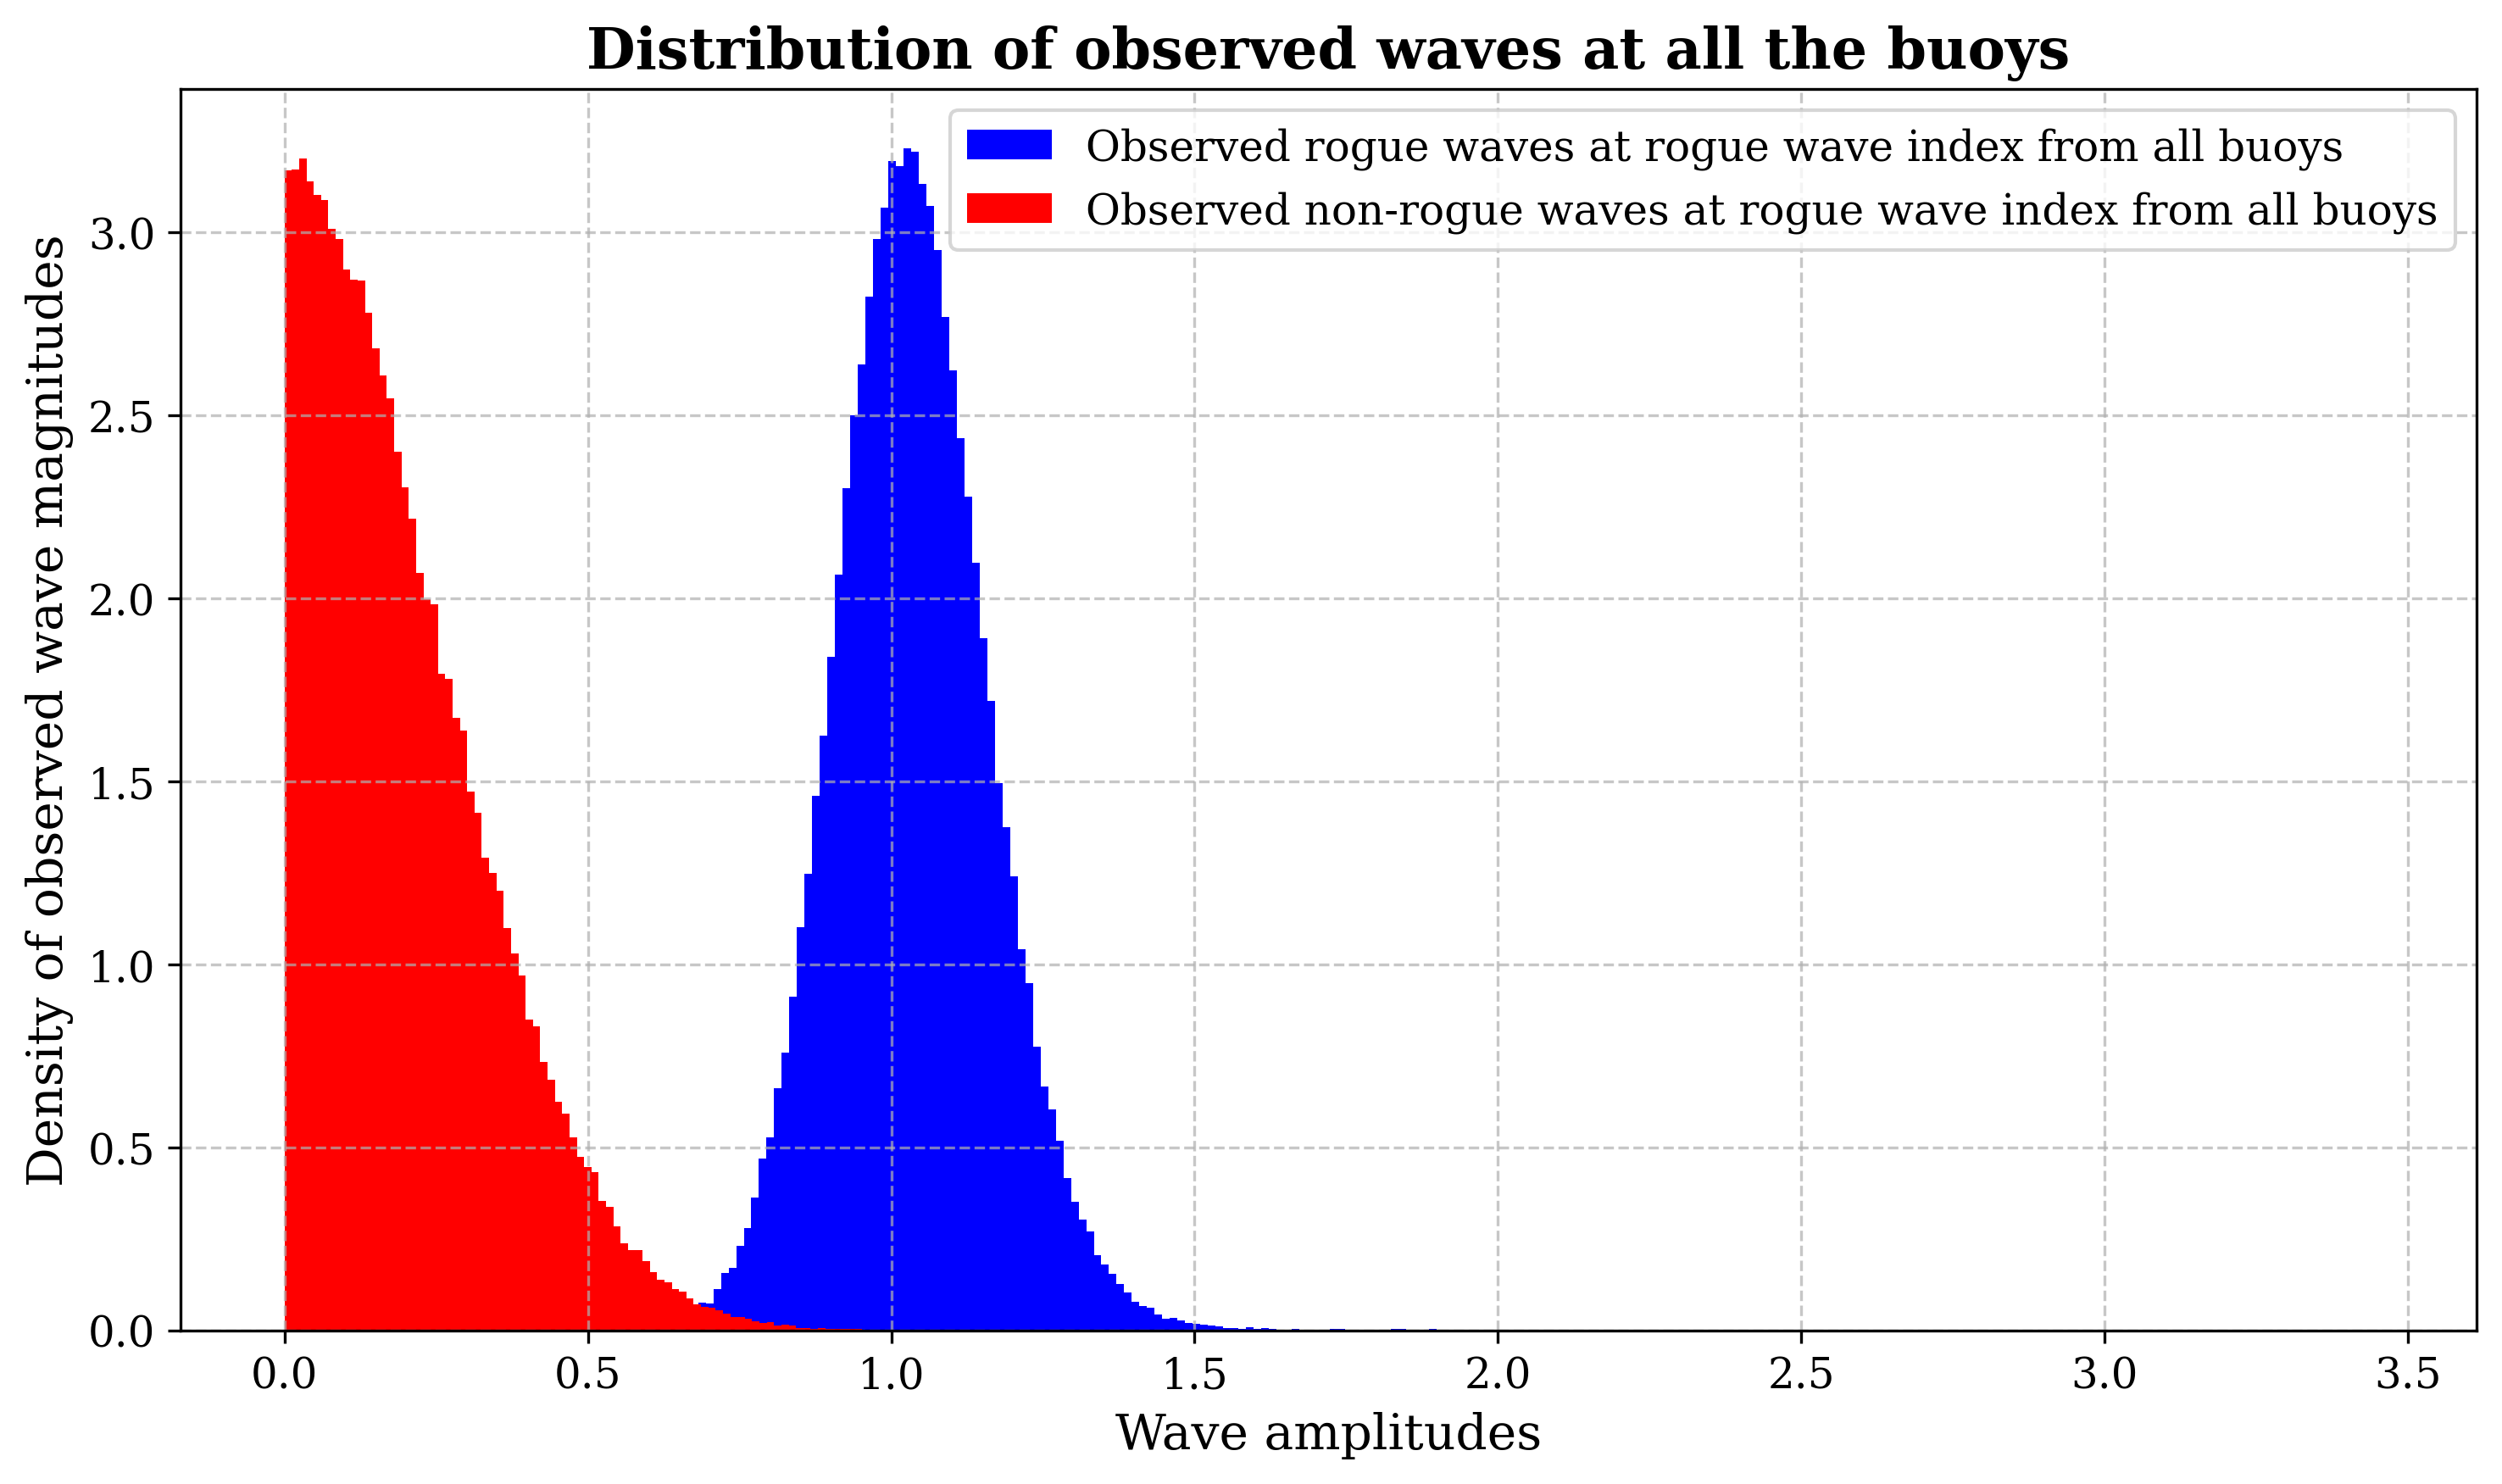

In [21]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12
plt.figure(figsize=[10,6], dpi = 300)

# Plot the histograms for both arrays
plt.hist(abs(y_rw), bins=250, color='blue', label="Observed rogue waves at rogue wave index from all buoys", density=True)
plt.hist(abs(y_norw), bins=100, color='red', label="Observed non-rogue waves at rogue wave index from all buoys", density=True)

# Add labels and title
plt.xlabel("Wave amplitudes", fontsize=14)
plt.ylabel("Density of observed wave magnitudes", fontsize=14)
plt.title("Distribution of observed waves at all the buoys", fontsize=16, fontweight='bold')

# Add a legend
plt.legend(fontsize=12)

# Customize grid and layout
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.savefig("Distribution of observed waves at all buoys.png")
plt.show()


### Segregating the wave groups based on the plot above. 

- **The segregation of groups is done as follows.** 
- ***There are an equal number of rogue wave and non-rogue wave samples in our data.***
- ***4 groups are formed for the data windows leading up to rogue wave samples.***
- ***This binning focuses on the distribution of waves as seen in the blue probability distribution function above***
- ***To create an equally distributed dataset for each of the groups, equal number of non-rogue wave samples as the rogue wave samples in each wave group are selected from the group of non-rogue wave samples.***

In [22]:
## finding the indices of the arrays based on a particular bin
indices_group1 = np.where((abs(y_rw)>=0) & (abs(y_rw) <=0.8))
indices_group2 = np.where((abs(y_rw)>0.8) & (abs(y_rw) <=1.05))
indices_group3 = np.where((abs(y_rw)>1.05) & (abs(y_rw) <=1.3))
indices_group4 = np.where(abs(y_rw)>1.3)

**Segregating the wave data based on the chosen ranges.**

In [25]:
import random

def divide_indices(indices, group_sizes):
    assert sum(group_sizes) == len(indices), "Group sizes must sum up to the total number of indices"

    random.shuffle(indices)
    groups = []
    start = 0

    for size in group_sizes:
        groups.append(indices[start:start + size])
        start += size
    return groups

**Rogue wave group sizes**

In [26]:
# Example usage:
indices = list(range(len(y_norw)))  # Example list of indices
group_sizes = [len(indices_group1[0]), len(indices_group2[0]), len(indices_group3[0]), len(indices_group4[0])]  # Example sizes for the four groups

print(group_sizes)

[4973, 90170, 70309, 4509]


**Dividing the non rogue wave group based on the rogue wave group sizes**

In [27]:
groups = divide_indices(indices, group_sizes)
indices_norw_groups = []
for i, group in enumerate(groups):
    indices_norw_groups.append(group)

In [28]:
len(indices_norw_groups[3])

4509

In [29]:
np.intersect1d(indices_norw_groups[0], indices_norw_groups[2]).size

0

**Extraction of the data from the rogue wave group based on the above binning ranges.**

In [30]:
## extracting the required data windows for the different wave magnitude categories
## creating dictionaries inout and output for storing the data of each group
X_dict = {}
Y_dict = {}

x_rw_group1 = x_rw[indices_group1[0],:]
print(x_rw.shape)
print(x_rw_group1.shape)
x_rw_group2 = x_rw[indices_group2[0],:]
x_rw_group3 = x_rw[indices_group3[0],:]
x_rw_group4 = x_rw[indices_group4[0],:]

y_rw_group1 = y_rw[indices_group1[0]]
y_rw_group2 = y_rw[indices_group2[0]]
y_rw_group3 = y_rw[indices_group3[0]]
y_rw_group4 = y_rw[indices_group4[0]]

X_dict['group1'] = x_rw_group1
X_dict['group2'] = x_rw_group2
X_dict['group3'] = x_rw_group3
X_dict['group4'] = x_rw_group4

Y_dict['group1'] = y_rw_group1
Y_dict['group2'] = y_rw_group2
Y_dict['group3'] = y_rw_group3
Y_dict['group4'] = y_rw_group4

(169961, 1152)
(4973, 1152)


**Extraction of the data from the non-rogue wave group based on the above binning ranges.**

In [31]:
## extracting the required data windows for the different wave magnitude categories
## creating dictionaries inout and output for storing the data of each group
X_norw_dict = {}
Y_norw_dict = {}

x_norw_group1 = x_norw[indices_norw_groups[0],:]
print(x_norw.shape)
print(x_norw_group1.shape)
x_norw_group2 = x_norw[indices_norw_groups[1],:]
x_norw_group3 = x_norw[indices_norw_groups[2],:]
x_norw_group4 = x_norw[indices_norw_groups[3],:]

y_norw_group1 = y_norw[indices_norw_groups[0]]
y_norw_group2 = y_norw[indices_norw_groups[1]]
y_norw_group3 = y_norw[indices_norw_groups[2]]
y_norw_group4 = y_norw[indices_norw_groups[3]]

X_norw_dict['group1'] = x_norw_group1
X_norw_dict['group2'] = x_norw_group2
X_norw_dict['group3'] = x_norw_group3
X_norw_dict['group4'] = x_norw_group4

Y_norw_dict['group1'] = y_norw_group1
Y_norw_dict['group2'] = y_norw_group2
Y_norw_dict['group3'] = y_norw_group3
Y_norw_dict['group4'] = y_norw_group4

(169961, 1152)
(4973, 1152)


**Verification of the group sizes and the array sizes.**

In [32]:
## verifying the sizes of the data windows and the rogue waves
for i in range(1,5):
    
    data_req_in = X_dict['group'+str(i)]
    data_req_out = Y_dict['group'+str(i)]
    
    print(f"The size of the rogue wave input window for group {i} rogue waves is {data_req_in.shape}")
    print(f"The size of the rogue wave output window for group {i} rogue waves is {data_req_out.shape}\n")

The size of the rogue wave input window for group 1 rogue waves is (4973, 1152)
The size of the rogue wave output window for group 1 rogue waves is (4973, 1)

The size of the rogue wave input window for group 2 rogue waves is (90170, 1152)
The size of the rogue wave output window for group 2 rogue waves is (90170, 1)

The size of the rogue wave input window for group 3 rogue waves is (70309, 1152)
The size of the rogue wave output window for group 3 rogue waves is (70309, 1)

The size of the rogue wave input window for group 4 rogue waves is (4509, 1152)
The size of the rogue wave output window for group 4 rogue waves is (4509, 1)



**Verification of equal number of rogue and non-rogue wave samples.**

In [33]:
## verifying the sizes of the data windows and the rogue waves
for i in range(1,5):
    data_req_in = X_norw_dict['group'+str(i)]
    data_req_out = Y_norw_dict['group'+str(i)]
    print(f"The size of the non-rogue wave input window for group {i} rogue waves is {data_req_in.shape}")
    print(f"The size of the non-rogue wave output window for group {i} rogue waves is {data_req_out.shape}\n")

The size of the non-rogue wave input window for group 1 rogue waves is (4973, 1152)
The size of the non-rogue wave output window for group 1 rogue waves is (4973, 1)

The size of the non-rogue wave input window for group 2 rogue waves is (90170, 1152)
The size of the non-rogue wave output window for group 2 rogue waves is (90170, 1)

The size of the non-rogue wave input window for group 3 rogue waves is (70309, 1152)
The size of the non-rogue wave output window for group 3 rogue waves is (70309, 1)

The size of the non-rogue wave input window for group 4 rogue waves is (4509, 1152)
The size of the non-rogue wave output window for group 4 rogue waves is (4509, 1)



**Combining the samples from rogue and non-rogue wave groups for a particular wave magnitude range, randomizing them and storing for use in training neural networks by dividing them into training and testing data.** 

In [ ]:
for i in range(1,5):
    np.random.seed(5)  
    len_array_rw = len(X_dict['group'+str(i)]) 
    len_array_norw = len(X_norw_dict['group'+str(i)])

    indices_rw_train = np.random.choice(len_array_rw, round(0.7*len_array_rw), replace=False)
    indices_rw_test = [ind not in indices_rw_train for ind in range(0,len_array_rw)]

    indices_norw_train = np.random.choice(len_array_norw, round(0.7*len_array_norw), replace=False)
    indices_norw_test = [ind not in indices_norw_train for ind in range(0,len_array_norw)]

    z_disp_rw_train = X_dict['group'+str(i)][indices_rw_train]
    labels_rw_train = np.ones(len(z_disp_rw_train))
    z_disp_rw_test = X_dict['group'+str(i)][indices_rw_test]
    labels_rw_test = np.ones(len(z_disp_rw_test))

    z_disp_norw_train = X_norw_dict['group'+str(i)][indices_norw_train]
    labels_norw_train = np.zeros(len(z_disp_norw_train))
    z_disp_norw_test = X_norw_dict['group'+str(i)][indices_norw_test]
    labels_norw_test = np.zeros(len(z_disp_norw_test))

    wave_data_train = np.concatenate((z_disp_rw_train, z_disp_norw_train), axis=0)
    label_train = np.concatenate((labels_rw_train, labels_norw_train), axis=0)

    idx = np.random.permutation(len(wave_data_train))
    wave_data_train = wave_data_train[idx]
    label_train=label_train[idx]

    wave_data_test = np.concatenate((z_disp_rw_test, z_disp_norw_test), axis=0)
    label_test = np.concatenate((labels_rw_test, labels_norw_test), axis=0)

    idx_test = np.random.permutation(len(wave_data_test))
    wave_data_test = wave_data_test[idx_test]
    label_test=label_test[idx_test]

    wave_data_train = wave_data_train.reshape((wave_data_train.shape[0], wave_data_train.shape[1], 1))
    wave_data_test = wave_data_test.reshape((wave_data_test.shape[0], wave_data_test.shape[1], 1))

    num_waves_total = len(wave_data_train)+len(wave_data_test)

    print(f"The total number of wave samples in the case for wave group {i} is {num_waves_total}.", end='\n')

    np.savez(os.getcwd() + f'/wave_groups/tadv_5min_wave_group_{i}',wave_data_train=wave_data_train, wave_data_test=wave_data_test,label_train=label_train,label_test=label_test)